In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
 
from sklearn.linear_model import LogisticRegression
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
dt_heart = pd.read_csv('../inputs/heart.csv')

In [6]:
dt_heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# Guardamos nuestro dataset sin la columna de target
dt_features = dt_heart.drop(['target'], axis=1)
# Este será nuestro dataset, pero sin la columna
dt_target = dt_heart['target']

In [8]:
# Normalizamos los datos
dt_features = StandardScaler().fit_transform(dt_features)

In [11]:
# Partimos el conjunto de entrenamiento. Para añadir replicabilidad usamos el random state
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

In [12]:
# Llamamos y configuramos nuestro algoritmo pca
'''EL número de componentes es opcional, ya que por defecto si no le pasamos el número de componentes lo asignará de esta forma:
a: n_components = min(n_muestras, n_features)'''
pca = PCA(n_components=3)
# Esto para que nuestro PCA se ajuste a los datos de entrenamiento que tenemos como tal
pca.fit(X_train)
#Como haremos una comparación con incremental PCA, haremos lo mismo para el IPCA.

,n_components,3
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [13]:
'''EL parámetro batch se usa para crear pequeños bloques, de esta forma podemos ir entrenandolos
poco a poco y combinarlos en el resultado final'''
ipca = IncrementalPCA(n_components=3, batch_size=10)
#Esto para que nuestro PCA se ajuste a los datos de entrenamiento que tenemos como tal
ipca.fit(X_train)

,n_components,3
,whiten,False
,copy,True
,batch_size,10


In [14]:
''' Aquí graficamos los números de 0 hasta la longitud de los componentes que me sugirió el PCA o que
me generó automáticamente el pca en el eje x, contra en el eje y, el valor de la importancia
en cada uno de estos componentes, así podremos identificar cuáles son realmente importantes
para nuestro modelo '''
print(pca.explained_variance_, pca.explained_variance_ratio_)


[2.68677712 1.57833496 1.21873514] [0.20928804 0.12294531 0.09493407]


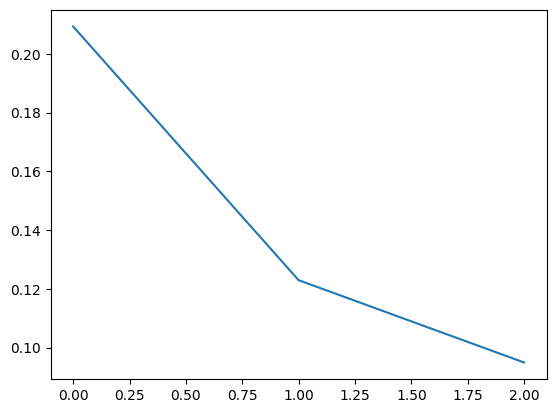

In [15]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

In [16]:
#Ahora vamos a configurar nuestra regresión logística
logistic = LogisticRegression(solver='lbfgs')
# Configuramos los datos de entrenamiento
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
# Mandamos los data frames la la regresión logística
logistic.fit(dt_train, y_train)
#Calculamos nuestra exactitud de nuestra predicción
print("SCORE PCA: ", logistic.score(dt_test, y_test))

SCORE PCA:  0.7857142857142857


In [17]:
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
# Mandamos los data frames la la regresión logística
logistic.fit(dt_train, y_train)
#Calculamos nuestra exactitud de nuestra predicción
print("SCORE IPCA: ", logistic.score(dt_test, y_test)) 

SCORE IPCA:  0.8051948051948052


### Analisis de numero de compomentes vs el accuracy

In [18]:
max_features = X_train.shape[1]  # El máximo número de features en este caso sería de 13
pca_data = {'accuracy': [],
            'n_components': []}
ipca_data = {'accuracy': [],
                'n_components': []}
# PCA

In [19]:
print("I'm running PCA")
for n in range(1, max_features+1):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    df_train = pca.transform(X_train)
    df_test = pca.transform(X_test)
    logistic.fit(df_train, y_train)
    acccuracy = logistic.score(df_test, y_test)
    print(f"PCA with n_componentes = {n} give us {acccuracy} Accuracy")
    pca_data['accuracy'].append(acccuracy)
    pca_data['n_components'].append(n)

# IPC

I'm running PCA
PCA with n_componentes = 1 give us 0.7694805194805194 Accuracy
PCA with n_componentes = 2 give us 0.7987012987012987 Accuracy
PCA with n_componentes = 3 give us 0.7857142857142857 Accuracy
PCA with n_componentes = 4 give us 0.8214285714285714 Accuracy
PCA with n_componentes = 5 give us 0.827922077922078 Accuracy
PCA with n_componentes = 6 give us 0.8181818181818182 Accuracy
PCA with n_componentes = 7 give us 0.8181818181818182 Accuracy
PCA with n_componentes = 8 give us 0.8181818181818182 Accuracy
PCA with n_componentes = 9 give us 0.8376623376623377 Accuracy
PCA with n_componentes = 10 give us 0.801948051948052 Accuracy
PCA with n_componentes = 11 give us 0.801948051948052 Accuracy
PCA with n_componentes = 12 give us 0.8051948051948052 Accuracy
PCA with n_componentes = 13 give us 0.8051948051948052 Accuracy


In [20]:
print("I'm running IPCA")
for n in range(1, max_features+1):
    ipca = IncrementalPCA(n_components=n, batch_size=max_features+1)
    ipca.fit(X_train)
    df_train = ipca.transform(X_train)
    df_test = ipca.transform(X_test)
    logistic.fit(df_train, y_train)
    acccuracy = logistic.score(df_test, y_test)
    print(f"IPCA with n_componentes = {n} give us {acccuracy} Accuracy")
    ipca_data['accuracy'].append(acccuracy)
    ipca_data['n_components'].append(n)

I'm running IPCA
IPCA with n_componentes = 1 give us 0.7694805194805194 Accuracy
IPCA with n_componentes = 2 give us 0.7922077922077922 Accuracy
IPCA with n_componentes = 3 give us 0.7857142857142857 Accuracy
IPCA with n_componentes = 4 give us 0.8051948051948052 Accuracy
IPCA with n_componentes = 5 give us 0.8084415584415584 Accuracy
IPCA with n_componentes = 6 give us 0.8084415584415584 Accuracy
IPCA with n_componentes = 7 give us 0.827922077922078 Accuracy
IPCA with n_componentes = 8 give us 0.8181818181818182 Accuracy
IPCA with n_componentes = 9 give us 0.8084415584415584 Accuracy
IPCA with n_componentes = 10 give us 0.8084415584415584 Accuracy
IPCA with n_componentes = 11 give us 0.8116883116883117 Accuracy
IPCA with n_componentes = 12 give us 0.8084415584415584 Accuracy
IPCA with n_componentes = 13 give us 0.8051948051948052 Accuracy


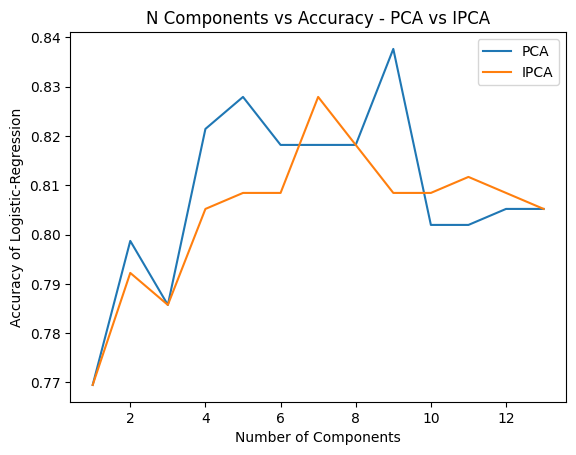

In [21]:
plt.plot(pca_data['n_components'], pca_data['accuracy'], label='PCA')
plt.plot(ipca_data['n_components'], ipca_data['accuracy'], label='IPCA')
plt.title('N Components vs Accuracy - PCA vs IPCA')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy of Logistic-Regression')
plt.legend()

plt.savefig("resultados.png")
plt.show()
plt.close()